## Import

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Question: Which among age, average glucose level, and body mass index (BMI) shows the most significant connection to the probability of stroke?
Purposes: Identifying the most influential factor allows healthcare professionals to prioritize interventions. If age, for instance, shows the strongest association, interventions might focus on age-related health management.

In [14]:
df = pd.read_csv('../data/processed/processed_data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Pre-processing

We assign the values 0 and 1 to 'No' and 'Yes,' respectively. This mapping provides more meaningful and easily interpretable visual representations.

In [15]:
df['heart_disease'] = df['heart_disease'].map({0:'No', 1:'Yes'}) 
df['hypertension'] = df['hypertension'].map({0:'No', 1:'Yes'}) 

### Analyzing to get the answer

**Step 01**: Firstly, I separate the data related to individuals who have experienced a stroke from those who haven't. Subsequently, we can create visual plots to understand the correlation between the data associated with stroke incidents and those without.

In [16]:
strokes_df = df[df['stroke'] == 1]
no_strokes_df = df[df['stroke'] == 0]

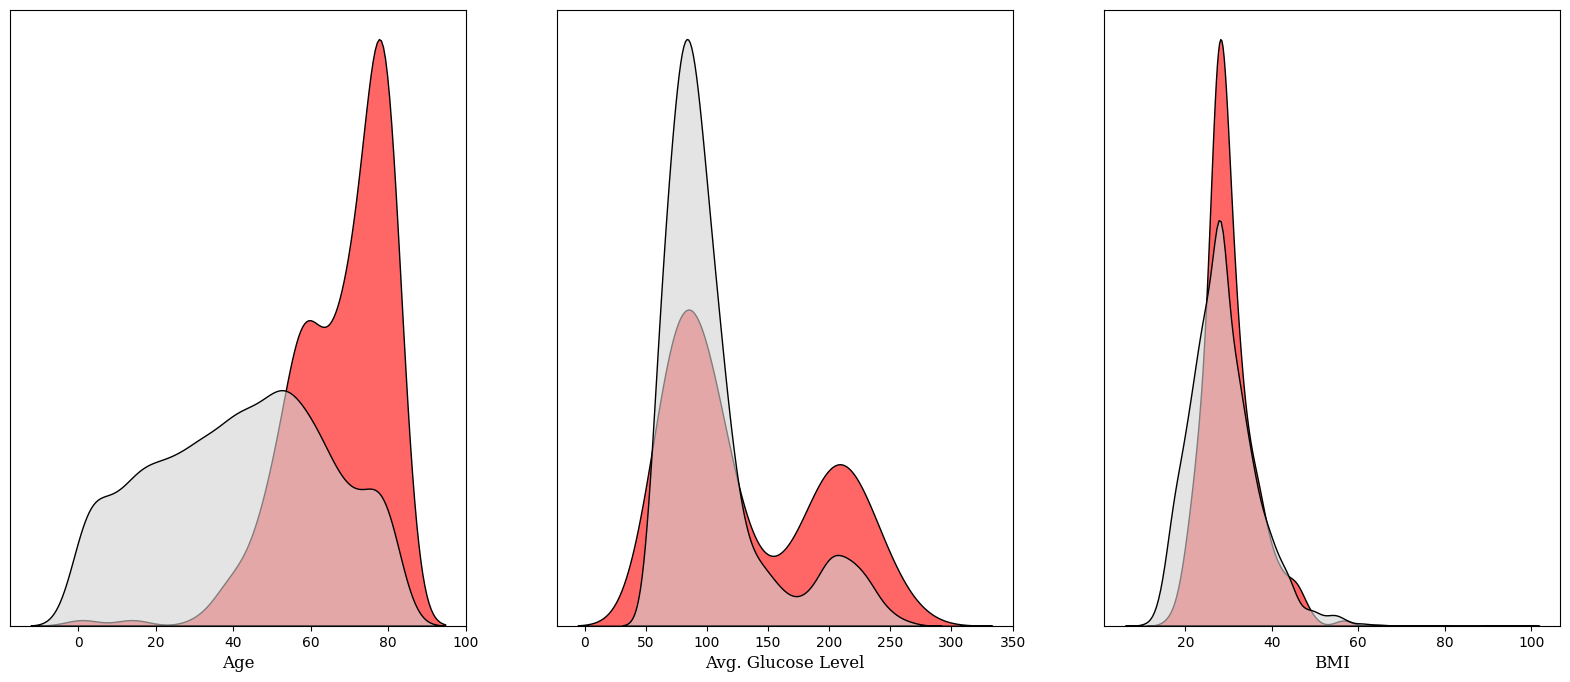

In [17]:
fig=plt.figure(figsize=(20,8),facecolor='white')
gs=fig.add_gridspec(1,3)
ax=[None for i in range(3)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[0,2])

ax[0].set_xlabel("Age",fontsize=12,fontfamily='serif')
ax[1].set_xlabel("Avg. Glucose Level",fontsize=12,fontfamily='serif')
ax[2].set_xlabel("BMI",fontsize=12,fontfamily='serif')
ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)

sns.kdeplot(x=strokes_df['age'],ax=ax[0],fill=True, color='red', alpha=0.6,zorder=3,edgecolor='black')
sns.kdeplot(x=strokes_df['avg_glucose_level'],ax=ax[1],fill=True, color='red', alpha=0.6,zorder=3,edgecolor='black')
sns.kdeplot(x=strokes_df['bmi'],ax=ax[2],fill=True, color='red', alpha=0.6,zorder=3,edgecolor='black')
sns.kdeplot(x=no_strokes_df['age'],ax=ax[0],fill=True, color='lightgrey', alpha=0.6,zorder=3,edgecolor='black')
sns.kdeplot(x=no_strokes_df['avg_glucose_level'],ax=ax[1],fill=True, color='lightgrey', alpha=0.6,zorder=3,edgecolor='black')
sns.kdeplot(x=no_strokes_df['bmi'],ax=ax[2],fill=True, color='lightgrey', alpha=0.6,zorder=3,edgecolor='black')
plt.show()

**Observation:** The patterns observed in the average glucose level and BMI are notably alike between stroke and no-stroke cases. However, when considering age, distinctions across various age groups are more apparent. As a result, we'll delve deeper into exploring the relationships involving average glucose level and BMI in the following question. For now, our primary focus will be on examining the impact of age.

**Step 02**: We have categorized age into four groups: Over 20, 20-40, 40-60, and Over 60. Our current analysis is exclusively centered on stroke data. We are visualizing this distribution through a pie chart and ensuring the proportionality is maintained by utilizing crosstab with two dataframes.

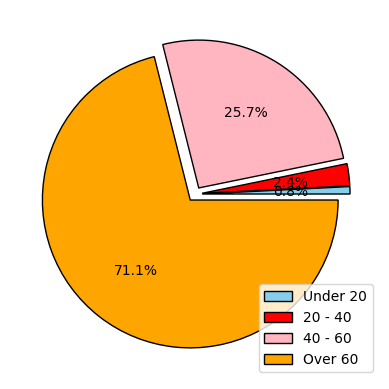

In [18]:
strokes_df['age_group'] = pd.cut(strokes_df['age'], bins=[0, 20, 40, 60, 100],labels=['0-20','20-40','40-60','60-100'])
cross_tab = pd.crosstab(strokes_df['age_group'],strokes_df['stroke'])
plt.pie(cross_tab[1], explode=[0.05, 0.05, 0.05, 0.05], 
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, colors=["skyblue", "red", "lightpink", "orange"], autopct="%1.1f%%")
plt.legend(['Under 20','20 - 40','40 - 60','Over 60'])
plt.show()

**Observation:** The category "Over 60" exhibits the highest percentage of stroke cases, followed by the age group "40-60." The proportion of strokes in the under-40 age group is relatively minimal, so we will disregard it for further analysis. It is evident from our observations that there is a clear correlation between higher age and an increased likelihood of experiencing a stroke.

**Step 03:** As part of this process, we introduce a new categorical column called "age_group," classifying individuals as either Middle-aged Adults (40-60) or Old Adults (> 60). Subsequently, we create visualizations depicting the relationship between age groups and other relevant factors. Finally, we draw conclusions based on our observations for this particular inquiry.


In [19]:
age_group_order = ['40 - 60', 'Over 60']
strokes_df['age_group'] = pd.cut(strokes_df['age'], bins=[40, 60, 100], labels=age_group_order)
strokes_df = strokes_df.loc[strokes_df['age'] >= 40, :]
strokes_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Over 60
1,51676,Female,61,No,No,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Over 60
2,31112,Male,80,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1,Over 60
3,60182,Female,49,No,No,Yes,Private,Urban,171.23,34.4,smokes,1,40 - 60
4,1665,Female,79,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Over 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,40460,Female,68,Yes,Yes,Yes,Private,Urban,247.51,40.5,formerly smoked,1,Over 60
244,17739,Male,57,No,No,Yes,Private,Rural,84.96,36.7,Unknown,1,40 - 60
246,27153,Female,75,No,No,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1,Over 60
247,34060,Male,71,Yes,No,Yes,Self-employed,Rural,87.80,28.1,Unknown,1,Over 60


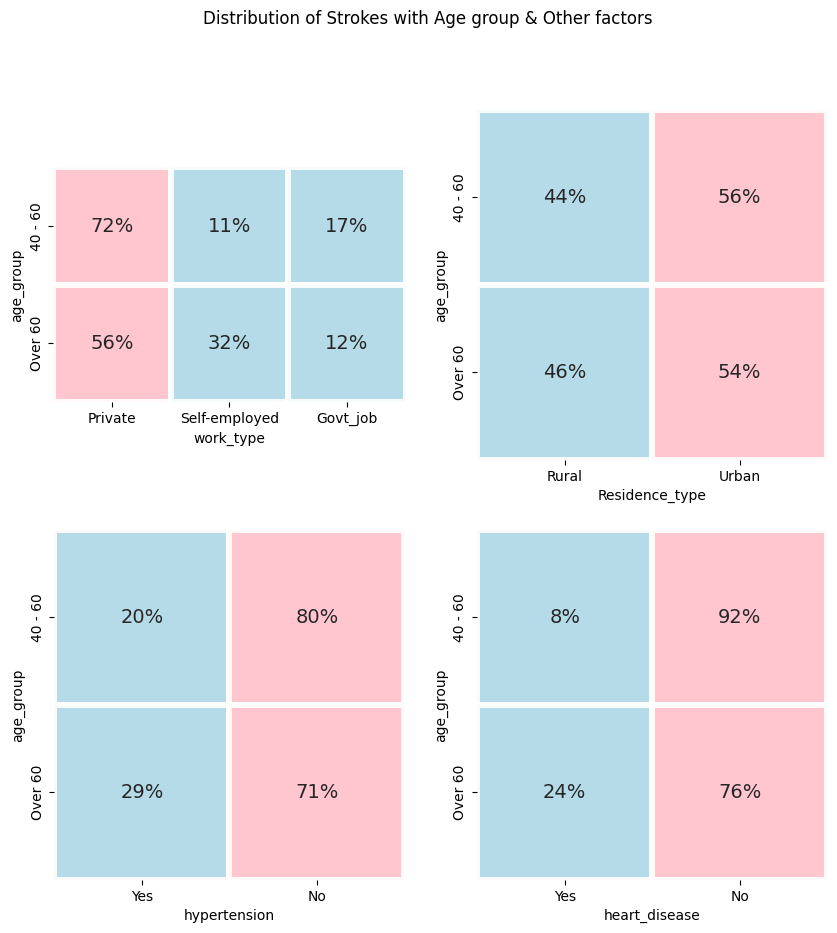

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

work_order = ['Private', 'Self-employed', 'Govt_job']
stroke_work = pd.crosstab(strokes_df['age_group'], [strokes_df['work_type']],normalize='index').loc[age_group_order, work_order]
sns.heatmap(data=stroke_work, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, annot=True, fmt='1.0%', annot_kws={"fontsize":14}, alpha = 0.9, cmap = ["lightblue","pink"], ax=axs[0][0])

residence_type_order = ["Rural", "Urban"]
stroke_residence_type = pd.crosstab(strokes_df['age_group'], [strokes_df['Residence_type']],normalize='index').loc[age_group_order, residence_type_order]
sns.heatmap(data=stroke_residence_type, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, annot=True, fmt='1.0%', annot_kws={"fontsize":14}, alpha = 0.9, cmap = ["lightblue","pink"], ax=axs[0][1])

hypertension_order = ["Yes", "No"]
stroke_hypertension = pd.crosstab(strokes_df['age_group'], [strokes_df['hypertension']],normalize='index').loc[age_group_order, hypertension_order]
sns.heatmap(data=stroke_hypertension, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, annot=True, fmt='1.0%', annot_kws={"fontsize":14}, alpha = 0.9, cmap = ["lightblue","pink"], ax=axs[1][0])

heart_disease_order = ["Yes", "No"]
stroke_heart_disease = pd.crosstab(strokes_df['age_group'], [strokes_df['heart_disease']],normalize='index').loc[age_group_order, heart_disease_order]
sns.heatmap(data=stroke_heart_disease, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, annot=True, fmt='1.0%', annot_kws={"fontsize":14}, alpha = 0.9, cmap = ["lightblue","pink"], ax=axs[1][1])

plt.suptitle("Distribution of Strokes with Age group & Other factors")
plt.show()

**Observation:** Private employment has the highest representation in two age groups, and the distribution of residence types is roughly similar between these two factors. The prevalence of hypertension in individuals aged over 60 surpasses that in the 40-60 age group by more than 9%. Notably, the incidence of heart disease in the over-60 age group is more than three times higher compared to the 40-60 age group

### Conclusion

- In general, age stands out as the most influential factor related to stroke likelihood. However, this association varies across different age brackets, with the highest stroke prevalence observed among individuals aged over 40 (middle-aged and older adults).  
- Additionally, work type, hypertension, and heart disease stand out as noteworthy considerations. Notably, the likelihood of stroke is significantly elevated, especially concerning heart disease, where individuals over 60 face a threefold higher probability of stroke compared to middle-aged individuals.